# ANN Classify 5 classes using Sparse categorical-entropy
- class: horse, bird, fish, cat & dog
- loss: compile(loss='sparse_categorical_crossentropy', .. )

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Dataset

In [2]:
# Gen Dataset 1
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=1.1, random_state=1)

In [3]:
# Dataset 2
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=1.8, random_state=1)

In [4]:
X_df = pd.DataFrame(X, columns=['weight', 'height'])
y_df = pd.DataFrame(y, columns=['class'])

df = pd.concat([X_df, y_df], axis=1)   # รวม X_df และ y_df เข้าด้วยกัน 

target_map = {0:'horse', 1:'bird', 2:'fish', 3:'cat',4:'dog'}  # target (class)
df['class'] = df['class'].map(target_map)

# df.head()
df.sample(5, random_state=100)

,weight,height,class
249,-13.092623,-3.850531,bird
353,-9.185691,-5.204206,bird
537,-4.049996,2.143423,dog
424,-8.851862,-1.416692,bird
564,-3.428062,0.123572,dog


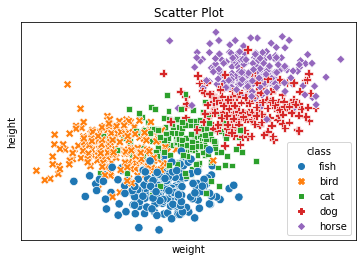

In [5]:
sns.scatterplot(x='weight', y='height', data=df, s=70,
                hue=df['class'], style=df['class'])

plt.title('Scatter Plot')
plt.xticks([])
plt.yticks([])
plt.show()

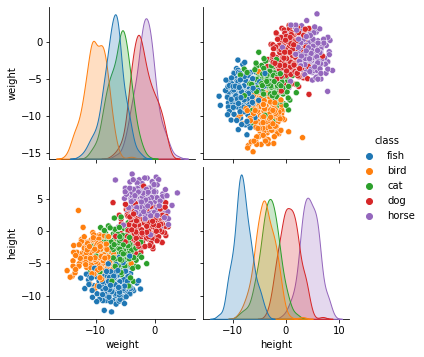

In [6]:
sns.pairplot(df, hue='class')
plt.show()

In [7]:
# Label Encoding
class_names, y = np.unique(df['class'], return_inverse=True)
class_names

array(['bird', 'cat', 'dog', 'fish', 'horse'], dtype=object)

In [8]:
y[:10]

array([3, 0, 1, 1, 2, 2, 3, 2, 2, 2], dtype=int64)

In [9]:
X = df.drop('class', axis=1)
X.head()

,weight,height
0,-7.373476,-7.816741
1,-14.006515,-7.012149
2,-5.781907,-3.394936
3,-4.697636,-2.866926
4,-1.730435,1.922980


In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:4]

array([[-0.55273   , -1.26576825],
       [-2.36310503, -1.09226469],
       [-0.11833826, -0.31224321],
       [ 0.17759505, -0.19838226]])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1) #

X_train.shape, X_test.shape

((750, 2), (250, 2))

In [12]:
y_train.shape

(750,)

In [13]:
y_train[:10]

array([1, 2, 3, 3, 4, 0, 2, 4, 3, 2], dtype=int64)

## Model

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

# Case 1
model = Sequential()

model.add(Dense(100, activation='relu', input_shape=(2,)))  #  

model.add(Dense(5, activation='softmax'))  # สำหรับ 5 classes

In [ ]:
# Case 2
model = Sequential()

model.add(Dense(100, activation='relu', input_shape=(2,)))  #  
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(5, activation='softmax'))  # สำหรับ 5 classes

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 5)                 505       
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='sparse_categorical_crossentropy',    # <<---
             optimizer='adam', 
             metrics=['accuracy'])

In [17]:
import time

start = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.25) # no1
end = time.time()

print(f"Time Taken {end - start:.2f} secs")

Time Taken 3.71 secs


In [18]:
score = model.evaluate(X_test, y_test, verbose=0)

print("Test loss:", score[0])
print(f"Test accuracy: {score[1]:.4f}")

Test loss: 0.4091419279575348
Test accuracy: 0.8360


## Loss and Accuracy Curves

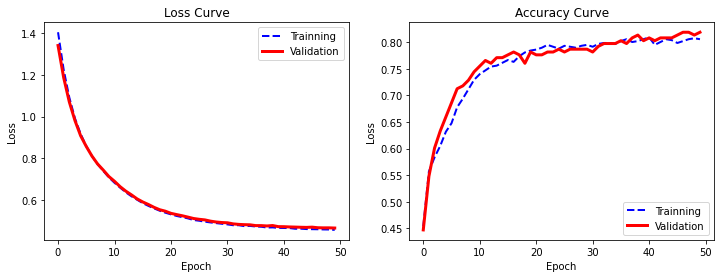

In [19]:
# 2 Columns
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)   # row column index
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')
plt.title('Loss Curve')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)   # row column index
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

## Predict

In [20]:
y_pred = model.predict(X_test)

y_pred[:4]
y_pred[:4].round(3)

8/8 [==============================] - 0s 2ms/step


array([[0.   , 0.   , 0.033, 0.   , 0.967],
       [0.   , 0.   , 0.059, 0.   , 0.941],
       [0.002, 0.129, 0.785, 0.001, 0.083],
       [0.028, 0.503, 0.006, 0.463, 0.   ]], dtype=float32)

In [21]:
y_pred_cat = np.argmax(y_pred, axis=1)
y_pred_cat[:4]

array([4, 4, 2, 1], dtype=int64)

In [22]:
class_names[y_pred_cat[:4]]

array(['horse', 'horse', 'dog', 'cat'], dtype=object)

## Confusion Matrix

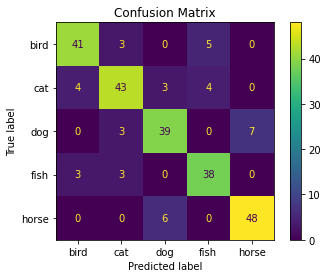

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_cat)   ## <-- 
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title('Confusion Matrix')
plt.show()

## Decision Regions

In [24]:
# 
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

model_no_ohe = Onehot2Int(model)    

3888/3888 [==============================] - 5s 1ms/step


C:\Users\Asus\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


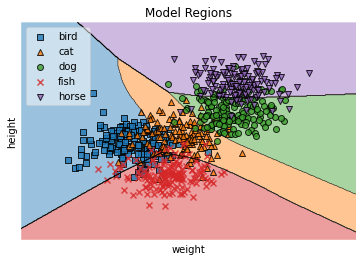

In [25]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(X_train, y_train, clf=model_no_ohe,
                          zoom_factor=1.)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Model Regions') 
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

## Drill: แบบฝึกหัด
- ปรับ Dataset ให้ค่าข้อมูล มีการคาบเกี่ยวกันมากขึ้น (เพิ่ม cluster_std เช่น 1.8) จะพบว่า Accuracy ลดลง เนื่องจากลักษณะการกระจายข้อมูลมีการคาบเกี่ยวกันมากขึ้น
- เพิ่มข้อมูล Dataset เป็น 2000 เพิ่มจำนวน Class เช่น 6, 7 Classes (กำหนด centers และ target_map)
- สร้าง NN ให้มีจำนวน Hidden Layer ต่าง ๆ เช่น 64, 128x64, 128x64x32 แล้วดูผล Accuracy
- วิเคราะห์ Loss Curve ว่ากำหนด Epochs เหมาะสมหรือไม่
- เพิ่มจำนวน Features ให้มากกว่า 2 เช่น 3 4 ... ฯลฯ (กำหนดที่ n_features, กำหนด columns ให้สอดคล้องกับจำนวน, และกำหนด input ที่ input_shape ด้วย) ** ไม่ต้องพล๊อต Decision Regions
